# Fundamental of Image Processing

Phần này giới thiệu một số khái niệm cơ bản về xử lý ảnh, thao tác với hình ảnh dùng Python

Tham khảo:

- [Giới thiệu về xử lý ảnh](https://nttuan8.com/bai-5-gioi-thieu-ve-xu-ly-anh/)
- [Kernel (image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))


## 1. Hệ màu RGB

Ảnh trong máy tính được biểu diễn dưới dạng hệ màu RGB. Gồm 3 màu: Red (Đỏ), Green (Xanh lá), Blue (Xanh dương). Khi trộn 3 màu này với tỉ lệ nhất định sẽ tạo ra các màu khác nhau.

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/RGB.png?w=1400&ssl=1)

**Pixel** là 1 đơn vị cơ bản nhất để tạo thành ảnh kỹ thuật số. Pixel trong hệ RGB được biểu diễn bằng 3 số nguyên r, g, b trong khoảng từ \[0, 255\]. tổng số màu có thể biểu diễn là $256*256*256=16.777.216$

Kích thước ảnh được đo bằng chiều dài x chiều rộng. VD: một bức ảnh có chiều dài 800x600 sẽ được biểu diễn bằng ma trận pixel 600x800 (cần ôn lại kiến thức Đại số tuyến tính)

Để tiện cho việc xử lý ảnh, ta sẽ tách ma trận ra 3 **channel** mảu R, G, B. Mỗi channel là 1 ma trận chỉ chứa riêng giá trị của kênh màu đó.

**Vector** là dữ liệu có 1 chiều.

**Matrix** là dữ liệu có 2 chiều.

**Tensor** là dữ liệu có nhiều hơn 2 chiều.

Ảnh màu trên máy tính sẽ được biểu diễn dưới dạng **tensor 3 chiều** gồm chiều dài * chiều rộng * 3 kênh màu.



# 2. Ảnh xám

Mỗi pixel ảnh xám được biểu diễn bằng 1 giá trị từ 0 tới 255 để biểu diễn độ sáng. Vì vậy, ảnh xám chỉ cần dùng 1 ma trận là đủ.

![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/03/gray.jpg?w=800&ssl=1)

Để chuyển từ ảnh màu sang ảnh xám, có thể dùng công thức:

$$L = \frac{299}{1000}R + \frac{587}{1000}G + \frac{114}{1000}B$$

# 3. Phép tích chập (Convolution)

## 3.1. Convolution

Cho ma trận ảnh $X$, ta định nghĩa **kernel** $W$ là ma trận vuông kích thước $k$ với $k$ lẻ.

Ta định nghĩa phép tích chập:

$$Y=X\otimes W$$

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/c1.png?w=939&ssl=1)

Cách tính như sau:

![](https://i1.wp.com/nttuan8.com/wp-content/uploads/2019/03/giphy.gif?w=1400&ssl=1)



## 3.2. Padding

Như phép tính trên, $Y$ thu được sẽ nhỏ hơn $X$, để thu được $Y$ có kích thước bằng $X$, ta thêm giá trị ở viền ngoài của ma trận.

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/c3.png?w=490&ssl=1)

Phép tính này là phép convolution với padding = 1. Với padding = k, ta thêm k vector 0 về mỗi phía của ma trận.

## 3.3. Stride

Ở ví dụ trên, nếu thực hiện tuần tự các phần tử trong X, thu được Y có kích thước bằng X, thì ta gọi là **stride = 1**.

![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/c4.png?w=491&ssl=1)

Tuy nhiên nếu stride=k (k > 1) thì ta chỉ thực hiện phép tính convolution trên các phần tử $x_{1+i*k,1+j*k}$. 

Ví dụ k = 2. Kích thước ma trận Y đã giảm còn 3x3.

![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/03/c5.png?w=492&ssl=1)

Công thức tổng quát cho phép tính convolution của ma trận X kích thước m*n với kernel kích thước k*k, stride = s, padding = p ra ma trận Y kích thước $\frac{m-k+2p}{s}+1) * (\frac{n-k+2p}{s}+1)$.

Stride thường dùng để giảm kích thước của ma trận sau phép tính convolution.

## 3.4. Ý nghĩa

Mục đích của phép tính convolution trên ảnh là làm mờ, làm nét ảnh; xác định các đường;… Mỗi kernel khác nhau thì sẽ phép tính convolution sẽ có ý nghĩa khác nhau. Ví dụ:

![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/03/purpose.png?w=670&ssl=1)

# 4. Thao tác với hình ảnh

Có rất nhiều thư viện với những tính năng khác nhau, phần này sử dụng OpenCV để thao tác với hình ảnh.

```sh
pip install opencv-python
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 4.1. Load hình ảnh


In [37]:
path = "../data/images/image_1.jpg"

img = cv2.imread(path)

## 4.2. Xem thông tin hình ảnh

Lưu ý: Channel trong OpenCV được sắp xếp theo Blue, Green, Red.

In [11]:
height, width, channel = img.shape
print("Height: ", height)
print("Width: ", width)
print("Channel: ", channel)

Height:  620
Width:  500
Channel:  3


## 4.3. Ghi ảnh


In [14]:
# clone ảnh
img2 = img[::]

# xóa màu xanh bằng cách set channel 0 về 0
img2[:,:,0] = 0 

# ghi ảnh
cv2.imwrite("../data/images/image_2.jpg", img2)

True

## 4.4. Resize ảnh

In [22]:
new_height = 300
new_width = 400

# resize dùng kích thước tuyệt đối
img_resized = cv2.resize(src=img, dsize=(new_width, new_height))
cv2.imwrite("../data/images/image_1_resized.jpg", img_resized)

# resize dùng tỉ lệ
img_resized_2 = cv2.resize(src=img, dsize=None, fx=0.5, fy=1)
cv2.imwrite("../data/images/image_1_resized2.jpg", img_resized_2)

True

## 4.5. Crop ảnh


In [23]:
# crop ảnh theo vùng y (50 -> 400), vùng x (240 -> 720)
img_crop = img[50:400, 240:720, :]
cv2.imwrite("../data/images/image_1_crop.jpg", img_crop)

True

## 4.6. Padding ảnh

- Padding ảnh là việc mà mình thêm các pixel vào các cạnh của ảnh để mở rộng ảnh ra.
- Thông thường giá trị pixel padding thêm sẽ là zero. Tức có màu đen.
- Padding sẽ cho hiệu ứng zoom out. Tức nội dung ảnh sẽ nhỏ đi so với toàn ảnh.

In [29]:
# tạo ma trận với kích thước mong muốn
img_pad = np.zeros([1000, 1000, 3])

# chuyển ảnh thành màu trắng
img_pad += 255

# thiết đặt vị trí ảnh gốc
y = 140
x = 200
img_pad[y:y+height, x:x+width,:] = img

cv2.imwrite("../data/images/image_1_padding.jpg", img_pad)


True

## 4.7. Đổi mức sáng

Công thức:

$$g(x,y)=\alpha*f(x,y)+\beta$$

In [36]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

cv2.imwrite("../data/images/image_1_down.jpg", change_brightness(img, 0.5, 1))
cv2.imwrite("../data/images/image_1_up.jpg", change_brightness(img, 1, 2))

True

## 4.8. Chuyển ảnh màu thành ảnh xám

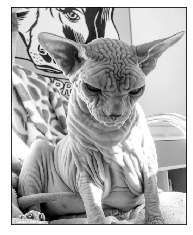

In [28]:
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert default 
img_show = cv2.cvtColor(im_gray, cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(img_show)
plt.show()

### 4.9. Ảnh nhị phân

Ảnh nhị phân là gì?
Ảnh nhị phân (hay còn gọi là binary image trong tiếng Anh) là ảnh đen trắng chỉ có 2 giá trị là 0 và 255 (miền số nguyên) hoặc 0 và 1 (miền số thực / đối với ROI).

Minh họa ảnh nhị phân bạn sẽ thấy ở các ảnh demo các phần bên dưới.

Công dụng ảnh nhị phân
Ảnh nhị phân thường được dùng cho phân đoạn ảnh (segmentation). Ví dụ: phân đoạn ảnh lá cây (những pixel nào là của cái lá), ta được ảnh nhị phân từ ảnh gốc (ảnh màu hoặc ảnh xám), từ đó ta biết trích xuất được thông tin "diện tích" lá.
Nhị phân hóa ảnh là bước tiền xử lý rất hữu ích cho các giải thuật nhận dạng chữ viết / ký tự (OCR: Optical Character Recognition).
Nhị phân hóa ảnh để tạo mặt nạ region of interest: xem bài post Tut 4: OpenCV vùng quan tâm (ROI) là gì? (code Python). Từ đó ta có thể áp dụng các phép biến đổi xử lý ảnh chỉ trên vùng ROI (thường thấy trong Photoshop).
Trong Photoshop ta thường nhị phân hóa ảnh để loại bỏ nền (ví dụ như nền trắng) tạo ảnh có độ trong suốt (transparent) file ảnh có đuôi .png.
Các bước nhị phân hóa ảnh
Biến đổi ảnh màu (color) sang ảnh xám (grayscale) hoặc đọc ảnh lên bằng cờ ảnh xám.
Thiết lập ngưỡng (threshold) để nhị phân hóa ảnh.
Áp dụng ngưỡng vào ảnh xám để tạo ảnh nhị phân hoặc áp dụng giải thuật nhị phân hóa ảnh. Các pixel có giá trị lớn hơn ngưỡng ta thiết lập bằng 255 (hoặc 1), nhỏ hơn ngưỡng ta thiết lập bằng 0.

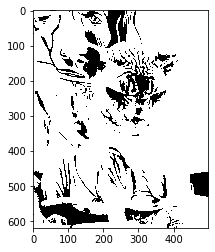

In [29]:
# chuyển ảnh màu thành ảnh xám
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# chuyển ảnh xám thành ảnh nhị phân với threshold 100
thresh, img_binary = cv2.threshold(im_gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

# chuyển sang dạng RGB để show lên pyplot
img_show = cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

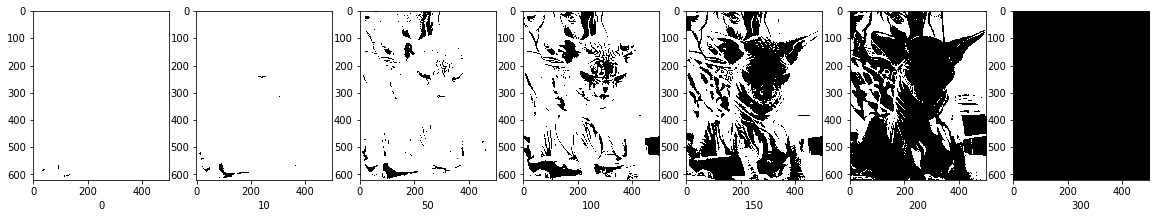

In [30]:
threshold_list = [ 0, 10, 50, 100, 150, 200, 300 ]
plt.figure(figsize=(20,20))
for i in range(len(threshold_list)):
    plt.subplot(1,len(threshold_list),i+1)
    
    plt.grid(False)
    _, img = cv2.threshold(im_gray, thresh=threshold_list[i], maxval=255, type=cv2.THRESH_BINARY)
    img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.xlabel(threshold_list[i])
plt.show()

### Giải thuật Adaptive Thresholding
Đôi khi giải thuật Thresholding đơn giản phía trên chưa cho ra kết quả tốt. Lúc này ta cần xem xét đến các giải thuật nhị phân hóa hình ảnh mạnh mẽ hơn như là Adaptive Thresholding. Adaptive Thresholding lựa chọn ngưỡng (threshold) động trong vùng lân cận (neighborhood). Cụ thể giải thuật nó sẽ làm như sau:

Đối với mỗi pixel ảnh, ta xét vùng ảnh con có blockSize x blockSize (blockSize là số lẻ) với pixel đang xét là trung tâm của vùng ảnh con này.
Các mức sáng trong vùng ảnh con blockSize x blockSize -> ta tính giá trị trung bình M (đối với phương pháp adaptive "cv2.ADAPTIVE_THRESH_MEAN_C") -> threshold áp dụng cho pixel đang xét: threshold = M - C (C là hằng số xác định trước).
Như vậy độ tốt của Adaptive Thresholding phụ thuộc vào 3 siêu tham số (hyper parameter):
adaptiveMethod: cv2.ADAPTIVE_THRESH_MEAN_C / cv2.ADAPTIVE_THRESH_GAUSSIAN_C
blockSize: kích thước vùng lân cận
C: hằng số mà ta sẽ trừ đi (C có thể là số dương, số âm hay bằng 0)

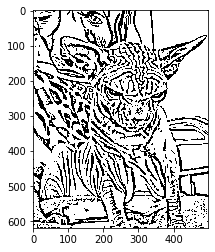

In [35]:
# chuyển ảnh xám thành ảnh nhị phân với threshold 100
img_adaptive = cv2.adaptiveThreshold(im_gray, maxValue=255,  
                                     adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
                                     thresholdType=cv2.THRESH_BINARY,
                                     blockSize=15, C=8)

# chuyển sang dạng RGB để show lên pyplot
img_show = cv2.cvtColor(img_adaptive, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

### 4.10. Làm mờ
Khi nhắc đến việc làm mờ hình ảnh, bạn sẽ nghĩ ngay đến việc tại mình phải làm điều đó? Ảnh đang rõ vậy làm mờ chi cho khó nhìn ta?!

Thực ra trong xử lý ảnh, phép làm mờ ảnh được dùng rất nhiều và có nhiều vai trò quan trọng. Hiệu ứng làm mờ mang lại (áp dụng trong các trường hợp):

Giảm nhiễu (noise) trong ảnh
Làm trơn ảnh (smooth). Việc làm trơn ảnh sẽ giảm sắc nét của cạnh, thay vào đó, vùng trơn sẽ lan ra
Trong các bài báo về xử lý ảnh, ở bước tiền xử lý họ hay dùng 2 phép biến đổi sau:

Cân bằng sáng
Làm mờ
Kích thước cửa sổ của các bộ lọc làm thường là SỐ LẺ NGUYÊN DƯƠNG (3, 5, 7, 9, …). Chính vì kích thước lẻ nên ta sẽ chỉ có 1 pixel ở trung tâm kernel, điều này tránh việc ta phải phân vân nên lấy pixel trái hay phải làm pixel trung tâm NẾU kích thước bộ lọc là số chẵn!

Việc chọn kích thước bộ lọc thường dựa vào kích thước ảnh đầu vào và kinh nghiệm. Kernel thường được thiết kế hình vuông (tức width = height)

Tính toán xử lý cho phép biến đổi làm mờ ảnh chính là dùng toán tử convolution để áp cửa sổ / bộ lọc lên ảnh gốc.

Tiếp theo, mình sẽ giới thiệu 3 bộ làm mờ giảm nhiễu phổ biến: Box Filter, Gaussian Filter và Median Filter



### Bộ lọc mờ trung bình (Box Filter)
Bộ lọc làm mờ trung bình được thiết kế bằng cách thiết lập mỗi giá trị trên bộ lọc bằng: 1/(W*H).
Tức là nếu Width và Height của bộ lọc bằng 3. Thì giá trị trên cửa sổ convolve sẽ là: 1/9.

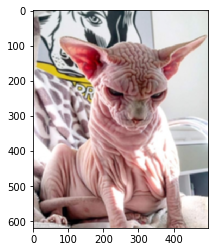

In [40]:
blur_img = cv2.blur(img, ksize=(5, 5))

img_show = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

### Bộ lọc làm mờ Gaussian (Gaussian Filter)

Công thức Gaussian: https://docs.opencv.org/2.4/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html#gaussian-filter
Ngoài kích thước cửa sổ, bộ lọc Gaussian còn cho phép thiết lập thêm 2 tham số là: Sigma X và Sigma Y, tức độ lệch chuẩn theo trục x và trục y tương ứng.


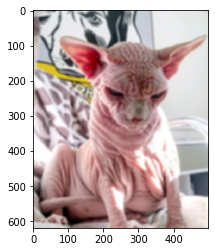

In [42]:
blur_img = cv2.GaussianBlur(img, ksize=(9, 9), sigmaX=4, sigmaY=4)

img_show = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

### Bộ lọc làm mờ trung vị (Median Filter)
Trung vị (median) là ta lấy ra giá trị trung vị sau khi sắp thứ tự dãy số. Ví dụ: median([6, 8, 11, 4, 1]) = 6. Giải: sau khi sắp thứ tự dãy [6, 8, 11, 4, 1], ta được [1, 4, 6, 8, 11] => số ở giữa dãy đã sắp thứ tự là 6.
Rất hiệu quả với nhiễu muối tiêu (tức nhiễu các hạt nhỏ trong ảnh).
Trong OpenCV, tham số cho bộ lọc trung vị chỉ có KERNEL_SIZE (không cho đặc tả Width / Height) và phải là số lẻ.

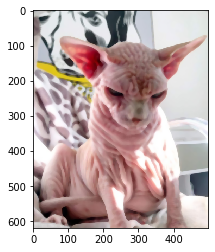

In [44]:
blur_img = cv2.medianBlur(img, 9)

img_show = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

### 4.11. Lật ảnh